### Data Overview

In [119]:
import pandas as pd

df = pd.read_csv("app/bank-full.csv",delimiter=';')
print(df.shape)

(45211, 17)


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [121]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [122]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

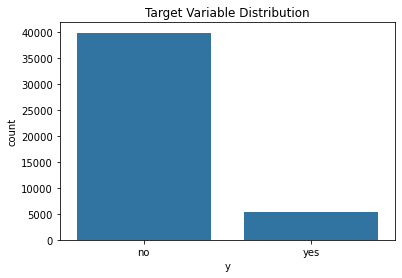

no     0.883015
yes    0.116985
Name: y, dtype: float64


In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='y')
plt.title("Target Variable Distribution")
plt.show()

print(df['y'].value_counts(normalize=True))

# Data Cleaning

### Data Observation
| Column    | Type        | Observation                                     | Cleaning Action                                                   |
| --------- | ----------- | ----------------------------------------------- | ----------------------------------------------------------------- |
| age       | Numerical   | 45,211 values — all present                     | Check for outliers (e.g., age > 90)                               |
| job       | Categorical | 12 unique values                                | Look for 'unknown' values; standardize categories                 |
| marital   | Categorical | 3 values (e.g., married/single/divorced)        | No cleaning unless 'unknown' exists                               |
| education | Categorical | 4 values                                        | Often contains 'unknown'; clean or encode accordingly             |
| default   | Categorical | 2 values                                        | Often includes 'unknown'; evaluate meaning and recode             |
| balance   | Numerical   | Continuous values                               | Consider outlier treatment (e.g., very high or negative balances) |
| housing   | Categorical | 2 values (yes/no)                               | Check for 'unknown'                                               |
| loan      | Categorical | 2 values (yes/no)                               | Same as above                                                     |
| contact   | Categorical | 3 values (cellular, telephone, unknown)         | unknown' should be treated or excluded                            |
| day       | Numerical   | Day of the month (1–31)                         | No cleaning needed unless used in feature engineering             |
| month     | Categorical | 12 values                                       | Map month names to ordinal (e.g., Jan=1) if needed                |
| duration  | Numerical   | Call duration                                   | Must be dropped during training (leakage)                         |
| campaign  | Numerical   | Number of contacts during this campaign         | Consider for outlier check                                        |
| pdays     | Numerical   | 999 = not contacted in previous campaign        | Use with care; 999 is not "missing" but needs semantic handling   |
| previous  | Numerical   | Past campaign contacts                          | Keep as is; useful for modeling                                   |
| poutcome  | Categorical | 4 values (success, failure, other, nonexistent) | nonexistent is not missing — treat as a valid category            |
| y         | Target      | 2 values (yes, no)                              | Convert to binary (1 = yes, 0 = no)                               |

## Column - age

In [124]:
# Summary Statistics
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

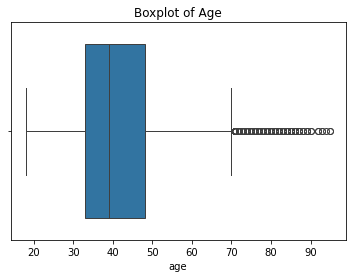

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['age'])
plt.title("Boxplot of Age")
plt.show()

In [126]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier threshold: age < {lower_bound:.1f} or age > {upper_bound:.1f}")

#Count outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(f"\nNumber of outliers in age: {len(outliers)}")

#Outlier values
print("\nOutlier values:")
print(outliers['age'].value_counts().sort_index())

Outlier threshold: age < 10.5 or age > 70.5

Number of outliers in age: 487

Outlier values:
71    54
72    52
73    44
74    37
75    39
76    32
77    44
78    30
79    25
80    31
81    17
82    19
83    22
84     9
85     5
86     9
87     4
88     2
89     3
90     2
92     2
93     2
94     1
95     2
Name: age, dtype: int64


### Action on Outliers
- Option A - Cap or Clip Outliers (This retains all records but limits extreme values.)
- Option B - Remove Outliers (This removes a small number of extreme rows, assuming they add noise.)
- Option C - Keep As-is


In [127]:
# Option B
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]
# Option A
#df['age'] = df['age'].clip(lower=lower_bound, upper=upper_bound)

## Column - Job

In [128]:
# Check for typos, formatting issues, and 'unknown' entries.
#df['job'].value_counts()
df['job'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

blue-collar      21.75%
management       21.12%
technician       16.98%
admin.           11.56%
services          9.29%
retired           4.09%
self-employed     3.52%
entrepreneur      3.32%
unemployed        2.91%
housemaid         2.74%
student            2.1%
unknown           0.63%
Name: job, dtype: object

In [129]:
# Standardize 'job' column
df['job'] = df['job'].str.lower().str.strip()
df['job'] = df['job'].replace('admin.', 'admin')

Handle 'unknown' Values
- Option A: Replace 'unknown' with the most frequent job (mode)
- Option B: Keep 'unknown' as a separate category
- Option C: Drop rows with 'unknown'

In [130]:
# Option A
most_common_job = df['job'].mode()[0]
print(f" Most common job {most_common_job}")
df['job'] = df['job'].replace('unknown', most_common_job)

# Option C
# df = df[df['job'] != 'unknown']

 Most common job blue-collar


## Column - education

In [131]:
#df['education'].value_counts()
df['education'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

secondary    51.58%
tertiary     29.55%
primary      14.83%
unknown       4.04%
Name: education, dtype: object

In [132]:
# Option A
most_common_edu = df['education'].mode()[0]
print(f" Most common education {most_common_edu}")
df['education'] = df['education'].replace('unknown', most_common_edu)

# Option C
# df = df[df['education'] != 'unknown']

 Most common education secondary


## Column - contact

In [133]:
df['contact'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

cellular     64.89%
unknown      29.11%
telephone      6.0%
Name: contact, dtype: object

In [134]:
# Option A
most_common_contact = df['contact'].mode()[0]
print(f" Most common education {most_common_contact}")
df['contact'] = df['contact'].replace('unknown', most_common_contact)

# Option C - Not recommended , we may lose lot of valuable data here
# df = df[df['education'] != 'unknown']

 Most common education cellular


## Column - balance

In [135]:
df['balance'].describe()

count     44724.000000
mean       1345.344491
std        2983.219087
min       -8019.000000
25%          71.000000
50%         442.000000
75%        1408.000000
max      102127.000000
Name: balance, dtype: float64

In [136]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier threshold: balance < {lower_bound:.1f} or balance > {upper_bound:.1f}")

#Count outliers
outliers = df[(df['balance'] < lower_bound) | (df['balance'] > upper_bound)]
print(f"\nNumber of outliers in balance: {len(outliers)}")

#Outlier values
print("\nOutlier values:")
print(outliers['balance'].value_counts().sort_index())

Outlier threshold: balance < -1934.5 or balance > 3413.5

Number of outliers in balance: 4696

Outlier values:
-8019      1
-6847      1
-4057      1
-3372      1
-3313      1
          ..
 66653     1
 66721     1
 71188     1
 98417     1
 102127    1
Name: balance, Length: 3002, dtype: int64


### Action on Outliers
- Option A - Cap or Clip Outliers (This retains all records but limits extreme values.)
- Option B - Remove Outliers (This removes a small number of extreme rows, assuming they add noise.)
- Option C - Keep As-is
- Option D - Any values below zero (i.e., negative balances) should be converted to 0. This is a practical cleaning step, especially if negative balances don't have business relevance or could bias the model.


In [137]:
#Option D
import numpy as np
df['balance'] = np.where(df['balance'] < 0, 0, df['balance'])

In [138]:
df['balance'].describe()

count     44724.000000
mean       1372.094647
std        2967.649251
min           0.000000
25%          71.000000
50%         442.000000
75%        1408.000000
max      102127.000000
Name: balance, dtype: float64

## Column - month

In [139]:
month_mapping = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
invalid_months = df[~df['month'].isin(month_mapping)]
print(f"Invalid months found: {len(invalid_months)}")

Invalid months found: 0


In [140]:
#df['month'].value_counts()
df['month'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

may    30.74%
jul    15.35%
aug    13.81%
jun     11.9%
nov      8.8%
apr     6.42%
feb     5.79%
jan      3.1%
oct     1.51%
sep     1.16%
mar     0.99%
dec     0.43%
Name: month, dtype: object

In [141]:
# Create a copy of the Original month Column
df['month_text'] = df['month']
# map months to ordinal values
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['month'] = df['month'].map(month_mapping)
df['month']


0         5
1         5
2         5
3         5
4         5
         ..
45203    11
45205    11
45206    11
45209    11
45210    11
Name: month, Length: 44724, dtype: int64

## Column - campaign

In [142]:
df['campaign'].describe()

count    44724.000000
mean         2.770682
std          3.108579
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

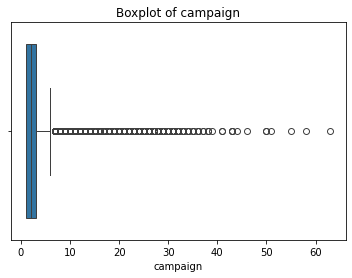

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['campaign'])
plt.title("Boxplot of campaign")
plt.show()

In [69]:
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier threshold: campaign < {lower_bound:.1f} or campaign > {upper_bound:.1f}")

#Count outliers
outliers = df[(df['campaign'] < lower_bound) | (df['campaign'] > upper_bound)]
print(f"\nNumber of outliers in campaign: {len(outliers)}")

#Outlier values
print("\nOutlier values:")
print(outliers['campaign'].value_counts().sort_index())

Outlier threshold: campaign < -2.0 or campaign > 6.0

Number of outliers in campaign: 3064

Outlier values:
7     735
8     540
9     327
10    266
11    201
12    155
13    133
14     93
15     84
16     79
17     69
18     51
19     44
20     43
21     35
22     23
23     22
24     20
25     22
26     13
27     10
28     16
29     16
30      8
31     12
32      9
33      6
34      5
35      4
36      4
37      2
38      3
39      1
41      2
43      3
44      1
46      1
50      2
51      1
55      1
58      1
63      1
Name: campaign, dtype: int64


In [144]:
print("Values below 0:", (df['campaign'] < 0).sum())
print("Values above 6:", (df['campaign'] > 6).sum())

Values below 0: 0
Values above 6: 3050


In [73]:
# Option A - Cap the Values
#df['campaign'] = df['campaign'].clip(lower=0, upper=6)
# Option B - Create a binned version
#df['campaign_group'] = pd.cut(
#    df['campaign'],
#    bins=[0, 2, 6, df['campaign'].max()],
#    labels=['low', 'medium', 'high'],
#    right=True
#)

### Feature Engnineering - Transforming `pdays` into Binary and Categorical Features

As part of feature engineering, the pdays column (which indicates the number of days since the last contact in a previous campaign) was transformed into:
was_previously_contacted: a binary feature (1 = contacted before, 0 = not contacted)
last_contact_category: a categorical feature classifying the recency of the last contact (never, recent, moderate, long_ago)
These transformations make the variable more interpretable and suitable for machine learning models.

0 → Not contacted before
1 → Contacted before

In [145]:
df['was_previously_contacted'] = df['pdays'].apply(lambda x: 0 if x == -1 else 1)

- Never contacted: -1
- Recently contacted: 0–7 days
- Moderately contacted: 8–60 days
- Long ago contacted: 61+ days

In [146]:
def categorize_pdays(x):
    if x == -1:
        return 'never'
    elif x <= 7:
        return 'recent'
    elif x <= 60:
        return 'moderate'
    else:
        return 'long_ago'

df['last_contact_category'] = df['pdays'].apply(categorize_pdays)


In [147]:
mismatch = df[df['was_previously_contacted'] != (df['previous'] > 0).astype(int)]
print(f"Number of mismatches: {len(mismatch)}")

Number of mismatches: 0


### Feature Engnineering - Understanding `pdays` and `previous` column to derive a new feature


-   **`pdays`**: Number of  **days since**  the client was  **last contacted in a previous campaign**.
    
    -   If  **`pdays = -1`**, the client was  **never contacted before**.
        
-   **`previous`**: Number of  **contacts made before**  this campaign.
    
    -   If  **`previous = 0`**, the client was  **not contacted in any previous campaign**.
        

### Therefore:

-   If  `pdays == -1`, then  `previous`  **must**  be  `0`.
    
-   If  `previous == 0`, then  `pdays`  **must**  be  `-1`.

***Below Code proves this relationship.***

In [148]:
# Condition 1: Where pdays = -1 but previous != 0
mismatch_1 = df[(df['pdays'] == -1) & (df['previous'] != 0)]

# Condition 2: Where previous = 0 but pdays != -1
mismatch_2 = df[(df['previous'] == 0) & (df['pdays'] != -1)]

print(f"Mismatches (pdays = -1 and previous ≠ 0): {len(mismatch_1)}")
print(f"Mismatches (previous = 0 and pdays ≠ -1): {len(mismatch_2)}")

Mismatches (pdays = -1 and previous ≠ 0): 0
Mismatches (previous = 0 and pdays ≠ -1): 0


**Categorize the  `previous`  Column**

We’ll add a new categorical column:  `previous_contact_category`

**Logic:**

| `previous` value | Category        |
| ---------------- | --------------- |
| 0                | never_contacted |
| 1                | contacted_once  |
| 2–3              | few_times       |
| ≥ 4              | many_times      |

In [149]:
def categorize_previous(x):
    if x == 0:
        return 'never_contacted'
    elif x == 1:
        return 'contacted_once'
    elif x <= 3:
        return 'few_times'
    else:
        return 'many_times'

df['previous_contact_category'] = df['previous'].apply(categorize_previous)

## Understanding the Relationship Between was_previously_contacted, poutcome, and y


To explore how prior marketing engagement influences current subscription behavior (`y`), we analyzed the interaction between:

-   **`was_previously_contacted`**  – binary indicator (1 = client contacted in previous campaign, 0 = never contacted),
    
-   **`poutcome`**  – outcome of the previous campaign (`success`,  `failure`,  `other`, or  `unknown`), and
    
-   **`y`**  – whether the client subscribed.

In [150]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [151]:
df['poutcome'].value_counts()

unknown    36653
failure     4836
other       1805
success     1430
Name: poutcome, dtype: int64

In [152]:
relationship_table = pd.crosstab(df['y'], df['was_previously_contacted'])
print(relationship_table)

was_previously_contacted      0     1
y                                    
no                        33389  6264
yes                        3259  1812


In [153]:
relationship_table = pd.crosstab(df['y'], df['poutcome'])
print(relationship_table)

poutcome  failure  other  success  unknown
y                                         
no           4243   1508      510    33392
yes           593    297      920     3261


In [154]:
three_way = pd.crosstab(
    index=[df['was_previously_contacted'], df['poutcome']],
    columns=df['y'],
    normalize='index'  # show percentages within each group
) * 100

three_way = three_way.round(2)
print(three_way)

y                                     no    yes
was_previously_contacted poutcome              
0                        unknown   91.11   8.89
1                        failure   87.74  12.26
                         other     83.55  16.45
                         success   35.66  64.34
                         unknown   60.00  40.00


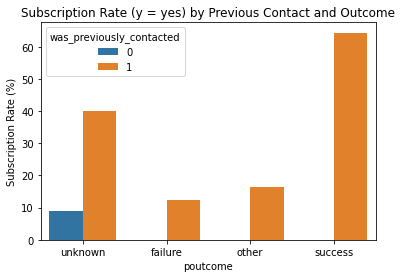

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the cross-tab to a DataFrame
three_way_plot = three_way.reset_index()

sns.barplot(
    data=three_way_plot,
    x='poutcome',
    y='yes',
    hue='was_previously_contacted'
)
plt.title('Subscription Rate (y = yes) by Previous Contact and Outcome')
plt.ylabel('Subscription Rate (%)')
plt.show()


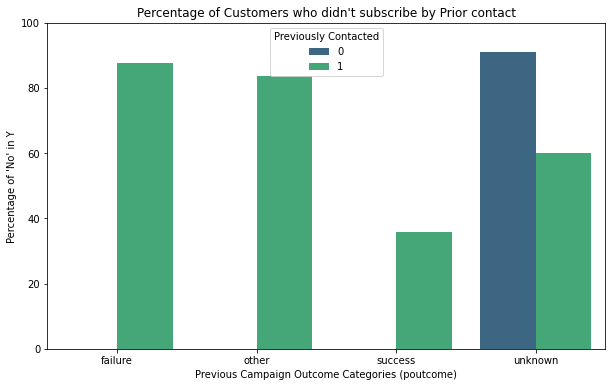

In [156]:

# Create a grouped percentage table
group = pd.crosstab(
    index=[df['poutcome'], df['was_previously_contacted']],
    columns=df['y'],
    normalize='index'
) * 100

#  Reset to flat DataFrame
group = group.reset_index()

# Rename 'no' column for clarity
group = group.rename(columns={'no': 'no_percent'})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=group,
    x='poutcome',
    y='no_percent',
    hue='was_previously_contacted',
    palette='viridis'
)
plt.title("Percentage of Customers who didn't subscribe by Prior contact")
plt.xlabel("Previous Campaign Outcome Categories (poutcome)")
plt.ylabel("Percentage of 'No' in Y")
plt.legend(title="Previously Contacted")
plt.ylim(0, 100)
plt.show()


# Recommendation for Model input


**Focus on clients who were previously contacted**  
Among them:

-   If  `y = "yes"`  → label as  **possible clients**
    
-   If  `y = "no"`  → label as  **failure (do not contact again)**  
    Skip or deprioritize clients who were never contacted (less reliable behavior history)

In [111]:
# Filter: Only those previously contacted
contacted_df = df[df['was_previously_contacted'] == 1].copy()

In [112]:
def classify_client(row):
    if row['y'] == 'yes':
        return 'possible_client_category'
    else:
        return 'failure'

# Create a New Column for Labeling

contacted_df['client_status'] = contacted_df.apply(classify_client, axis=1)

In [157]:
print(contacted_df['client_status'].value_counts())

failure                     6352
possible_client_category    1905
Name: client_status, dtype: int64


In [162]:
contacted_df = contacted_df.drop('duration', axis=1)

In [163]:
contacted_df.to_csv('./data/cleaned_contacted_data.csv', index=False)

In [164]:
df.to_csv('./data/cleaned_full_data.csv', index=False)

**Check for Imbalance**

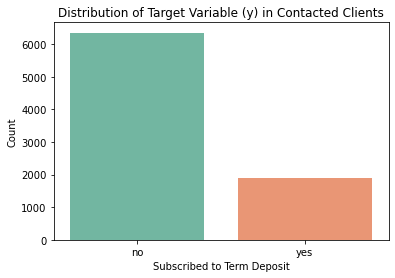

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=contacted_df, x='y', hue='y', palette='Set2', legend=False)
plt.title("Distribution of Target Variable (y) in Contacted Clients")
plt.ylabel("Count")
plt.xlabel("Subscribed to Term Deposit")
plt.show()


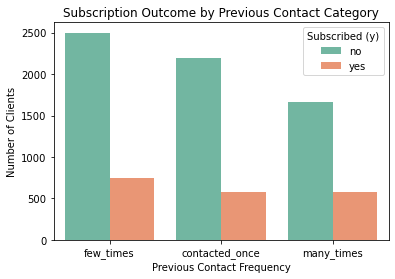

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=contacted_df, 
              x='previous_contact_category', 
              hue='y', 
              palette='Set2')
plt.title("Subscription Outcome by Previous Contact Category")
plt.xlabel("Previous Contact Frequency")
plt.ylabel("Number of Clients")
plt.legend(title="Subscribed (y)")
plt.xticks(rotation=0)
plt.show()


## Columns left without any pre-processing 
- ***martial*** - No cleaning required, as no 'unknown' or null values found
- ***default*** - No cleaning required, as no 'unknown' or null values found
- ***housing*** - No cleaning required, as no 'unknown' or null values found
- ***loan*** - No cleaning required, as no 'unknown' or null values found
- ***day*** - No cleaning required, as no 'unknown' or null or invalid values found
- ***duration*** - No impact on the training. ***???? Need to confirm with team*** - The duration column, although highly predictive, is excluded from model training to avoid data leakage. Since it reflects the length of a call that has already happened, it is not available at prediction time and would result in an unrealistic model performance if included.

### Data Observation
| Column    | Type        | Observation                                     | Cleaning Action Performed                                         |
| --------- | ----------- | ----------------------------------------------- | ----------------------------------------------------------------- |
| age       | Numerical   | 45,211 values — all present                     | Actioned on Outliers.                                             |
| job       | Categorical | 12 unique values                                | Replaced unknownd with freq mode; standardize categories          |
| marital   | Categorical | 3 values (e.g., married/single/divorced)        | No cleaning                                                       |
| education | Categorical | 4 values                                        | Replaced unknownd with freq mode; standardize categories          |
| default   | Categorical | 2 values                                        | No cleaning                                                       |
| balance   | Numerical   | Continuous values                               | Actioned on Outliers.                                             |
| housing   | Categorical | 2 values (yes/no)                               | No cleaning                                                       |
| loan      | Categorical | 2 values (yes/no)                               | No cleaning                                                       |
| contact   | Categorical | 3 values (cellular, telephone, unknown)         | Replaced unknownd with freq mode; standardize categories          |
| day       | Numerical   | Day of the month (1–31)                         | No cleaning                                                       |
| month     | Categorical | 12 values                                       | Map month names to ordinal (e.g., Jan=1)                          |
| duration  | Numerical   | Call duration                                   | Must be dropped during training (leakage) - No cleaning           |
| campaign  | Numerical   | Number of contacts during this campaign         | Actioned on Outliers.                                             |
| pdays     | Numerical   | 999 = not contacted in previous campaign        | Derived new field - was_previously_contacted                      |
| previous  | Numerical   | Past campaign contacts                          | Derived new field - previous_contact_category                     |
| poutcome  | Categorical | 4 values (success, failure, other, unknown)     | unknown is not missing — treat as a valid category                |
| y         | Target      | 2 values (yes, no)                              | Convert to binary (1 = yes, 0 = no)                               |

In [80]:
invalid_days = df[(df['day'] < 1) | (df['day'] > 31)]
print(f"Number of invalid day values: {len(invalid_days)}")

Number of invalid day values: 0


In [64]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

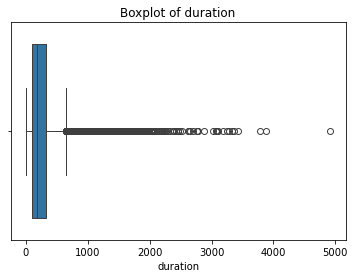

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['duration'])
plt.title("Boxplot of duration")
plt.show()

In [66]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier threshold: duration < {lower_bound:.1f} or duration > {upper_bound:.1f}")

#Count outliers
outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]
print(f"\nNumber of outliers in duration: {len(outliers)}")

#Outlier values
print("\nOutlier values:")
print(outliers['duration'].value_counts().sort_index())

Outlier threshold: duration < -221.0 or duration > 643.0

Number of outliers in duration: 3235

Outlier values:
644     13
645     15
646      7
647      8
648      9
        ..
3366     1
3422     1
3785     1
3881     1
4918     1
Name: duration, Length: 929, dtype: int64


In [88]:
print("Minimum pdays:", df['pdays'].min())
print("Maximum pdays:", df['pdays'].max())

Minimum pdays: -1
Maximum pdays: 871
